<a href="https://colab.research.google.com/github/blondedman/optimization-of-nuSVC/blob/main/optimization-of-nuSVC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import random as r

import numpy as np
import pandas as pd

from sklearn.svm import NuSVC
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score
from sklearn.model_selection import learning_curve
from sklearn.model_selection import train_test_split

In [2]:
bestAccuracy = 0

bestKernel = ""
bestNu = 0       # [0,1]

iterations = 10

kernels = ['poly', 'sigmoid', 'linear', 'rbf']

In [3]:
df = pd.read_csv('HTRU_2.csv')

In [4]:
df.head()

,profile_mean,profile_stdev,profile_skewness,profile_kurtosis,DM_mean,DM_stdev,DM_skewness,DM_kurtosis,class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [5]:
X = df.iloc[:,0:-1]
y = df['class']

In [6]:
samples = []

for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i)
    samples.append((X_train, X_test, y_train, y_test))

In [7]:
result = pd.DataFrame(columns=['sample', 'Best Accuracy', 'Best Kernel', 'Best Nu'])

##Fitness Function

In [8]:
def fitnessFunction(k, n):
    # train model (classification)
    model = NuSVC(kernel=k, nu=n)
    model.fit(X_train, y_train)  # Replace with your data

    # predictions from model
    predicted = model.predict(X_test)  # No rounding needed

    # calculate accuracy
    accuracy = round(accuracy_score(y_test, predicted) * 100, 2
                     )
    return accuracy

## Calling Function

In [10]:
for i in range(len(samples)):

  best_accuracy = 0
  best_nu = 0

  for kernel in kernels:

    X_train, X_test, y_train, y_test = samples[i]

    # convert labels to numeric codes (0, 1, 2, ...)
    numeric_labels, unique_classes = pd.factorize(y_train)

    # now use numeric_labels instead of y_train for calculations
    class_proportions = np.bincount(numeric_labels) / len(numeric_labels)
    max_nu = np.min(class_proportions)

    nu = r.uniform(0.001, max_nu)

    score = fitnessFunction(kernel, nu)

    print(score, kernel, nu)

    if score > best_accuracy:

      best_kernel = kernel
      best_nu = nu

      best_accuracy = score

    print(best_accuracy, best_kernel, best_nu)

  print('Best Accuracy = ', best_accuracy, 'Best Kernel = ', best_kernel, 'Best Nu = ', best_nu)
  result.loc[i] = [i+1, best_accuracy, best_kernel, best_nu]

97.43 poly 0.0905361125614704
97.43 poly 0.0905361125614704
18.06 sigmoid 0.022354860094425034
97.43 poly 0.0905361125614704
98.03 linear 0.040359567279950305
98.03 linear 0.040359567279950305
83.56 rbf 0.02250615134756284
98.03 linear 0.040359567279950305
Best Accuracy =  98.03 Best Kernel =  linear Best Nu =  0.040359567279950305
97.52 poly 0.05188648258821214
97.52 poly 0.05188648258821214
14.21 sigmoid 0.04164944740775129
97.52 poly 0.05188648258821214
97.13 linear 0.09035856276232042
97.52 poly 0.05188648258821214
97.95 rbf 0.0492504914744288
97.95 rbf 0.0492504914744288
Best Accuracy =  97.95 Best Kernel =  rbf Best Nu =  0.0492504914744288
97.47 poly 0.06636983314048168
97.47 poly 0.06636983314048168
8.92 sigmoid 0.07776968548377435
97.47 poly 0.06636983314048168
97.34 linear 0.06518530521410675
97.47 poly 0.06636983314048168
97.15 rbf 0.06969327964890111
97.47 poly 0.06636983314048168
Best Accuracy =  97.47 Best Kernel =  poly Best Nu =  0.06636983314048168
97.58 poly 0.0576426

In [11]:
result.head(10)

,sample,Best Accuracy,Best Kernel,Best Nu
0,1,98.03,linear,0.040360
1,2,97.95,rbf,0.049250
2,3,97.47,poly,0.066370
3,4,97.58,poly,0.057643
4,5,98.18,rbf,0.048708
5,6,97.93,poly,0.057865
6,7,97.23,rbf,0.076873
7,8,97.80,rbf,0.049033
8,9,97.78,linear,0.056279
9,10,97.91,linear,0.048878


## Manual Method

In [14]:
splits = []

for seed in range(10):
    train, test = train_test_split(df, test_size=0.3, random_state=seed, stratify=df['class'])
    splits.append({'train': train, 'test': test})


print(f"split 0 - train shape: {splits[0]['train'].shape}, test shape: {splits[0]['test'].shape}")

split 0 - train shape: (12528, 9), test shape: (5370, 9)


In [16]:
split = splits[0]

# training data
X_train = split['train'].drop(columns=['class'])
y_train = split['train']['class']

# testing data
X_test = split['test'].drop(columns=['class'])
y_test = split['test']['class']

In [17]:
def fitnessFunction(k, n):
    # train model (classification)
    model = NuSVC(kernel=k, nu=n)
    model.fit(X_train, y_train)  # Replace with your data

    # predictions from model
    predicted = model.predict(X_test)  # No rounding needed

    # calculate accuracy
    accuracy = round(accuracy_score(y_test, predicted) * 100, 2
                     )
    return accuracy

In [18]:
# convert labels to numeric codes (0, 1, 2, ...)
numeric_labels, unique_classes = pd.factorize(y_train)

# now use numeric_labels instead of y_train for calculations
class_proportions = np.bincount(numeric_labels) / len(numeric_labels)
max_nu = np.min(class_proportions)

In [19]:
for i in range(iterations):

  # choosing parameters randomly
  k = r.sample(kernelList, 1)[0]
  n = r.uniform(0.001, max_nu)

  try:
    accuracy = fitnessFunction(k, n)
  except ValueError:
    continue

  print(accuracy, k, n)

  if accuracy > bestAccuracy:

    bestKernel = k
    bestNu = n

    bestAccuracy = accuracy

  print(bestAccuracy, bestKernel, bestNu)
  print(f'')

97.84 rbf 0.04608989290197138
97.84 rbf 0.04608989290197138

18.23 sigmoid 0.023442907222588714
97.84 rbf 0.04608989290197138

10.56 sigmoid 0.06255619035730044
97.84 rbf 0.04608989290197138

29.27 poly 0.018753869978902868
97.84 rbf 0.04608989290197138

92.59 sigmoid 0.08904077566794227
97.84 rbf 0.04608989290197138

97.71 poly 0.05969303003094465
97.84 rbf 0.04608989290197138

18.29 sigmoid 0.024052750984528234
97.84 rbf 0.04608989290197138

2.35 linear 0.021142980828450716
97.84 rbf 0.04608989290197138

97.09 linear 0.08510588203809058
97.84 rbf 0.04608989290197138

13.45 sigmoid 0.045299109067396495
97.84 rbf 0.04608989290197138



## Convergence Graph

In [12]:
X_train, X_test, y_train, y_test = samples[result['Best Accuracy'].idxmax()]

In [36]:
train_sizes, train_scores, test_scores = learning_curve(
    NuSVC(kernel=result['Best Kernel'].iloc[result['Best Accuracy'].idxmax()],
          nu=0.5*result['Best Nu'].iloc[result['Best Accuracy'].idxmax()],
          max_iter = 15),
    X_train, y_train, cv=10, scoring='accuracy', n_jobs=-1, train_sizes = np.linspace(0.01, 1.0, 50))

In [37]:
train_sizes.sort()

In [38]:
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

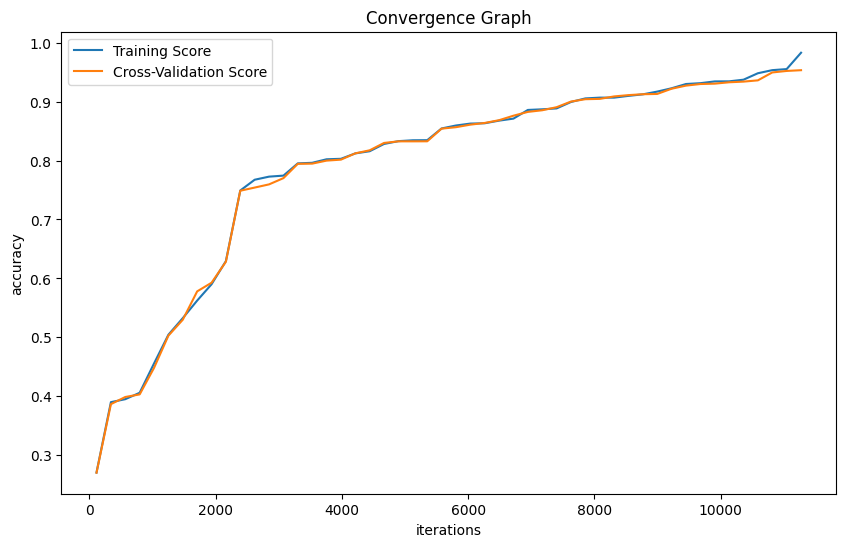

In [40]:
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, sorted(train_mean), label='Training Score')
plt.plot(train_sizes, sorted(test_mean), label='Cross-Validation Score')
plt.xlabel('iterations')
plt.ylabel('accuracy')
plt.title('Convergence Graph')
plt.legend(loc="best")
plt.show()